In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf #importing Yahoo Finance Liberary
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

### Fetching data from yfinance

In [7]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=394)).strftime("%Y-%m-%d")

# list of stock tickers to download
#tickers = ['GOOGL', 'NVDA', 'BABA', 'AMD', 'LCID', 'TSLA', 'AAPL', 'T', 'F', 'MSFT', ]
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "NVDA", "TSLA", "INTC", "AMD", "QCOM",
    "CSCO", "ORCL", "ADBE", "CRM", "PYPL", "AVGO", "SPOT", "UBER", "ZM", "TWLO",
    "NOW", "SQ", "PLTR", "SNAP", "ROKU", "PINS", "NOK", "TMUS", "T", "VZ", "SPOT",
    "MTCH", "DBX",  "EA", "NFLX", "INTU", "WDAY", "MCHP", "TXN",
]

df_original = yf.download(tickers, start=start_date, end=end_date, progress=False)

df_original.reset_index(inplace=True)


# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
#data_melted = data.melt(id_vars=[(  'Date',     '')], var_name=['Attribute', 'Ticker'])

df_original.head()

Price        Date       Close                                                  \
Ticker                   AAPL        ADBE         AMD        AMZN        AVGO   
0      2024-01-05  180.296707  564.599976  138.580002  145.240005  103.533478   
1      2024-01-08  184.655365  580.549988  146.179993  149.100006  106.056496   
2      2024-01-09  184.237411  586.200012  149.259995  151.369995  106.810341   
3      2024-01-10  185.282318  591.030029  148.539993  153.729996  106.620895   
4      2024-01-11  184.685226  597.489990  148.020004  155.179993  108.536102   

Price                                                 ...    Volume            \
Ticker         CRM       CSCO        DBX          EA  ...        SQ         T   
0       249.725174  48.557541  29.160000  134.906708  ...  11150662  33288500   
1       259.421021  48.916218  29.830000  135.752304  ...   9210757  41215100   
2       259.888428  48.383045  29.670000  137.005768  ...   8077134  30338400   
3       262.662903  48.702953  30.209999  136.916245  ...   8705667  26893800   
4       269.872650  48.896835  31.059999  137.025665  ...   7617722  59137500   

Price                                                                      \
Ticker     TMUS       TSLA     TWLO      TXN      UBER        VZ     WDAY   
0       4552800   92379400  1769400  3087200  17875200  30212900  1781200   
1       4135100   85166600  6674500  5717500  21213000  28483000  1557700   
2       4102500   96705700  2497300  5018500  22319900  17880100  1093500   
3       4502200   91628500  2077400  4045200  30788900  16354700  1220500   
4       3662000  105873600  2490000  5635600  28888900  31289800   827300   

Price            
Ticker       ZM  
0       1958800  
1       2341300  
2       2178200  
3       2078300  
4       3334700  

[5 rows x 191 columns]

In [8]:
list(df_original.columns)

[('Date', ''),
 ('Close', 'AAPL'),
 ('Close', 'ADBE'),
 ('Close', 'AMD'),
 ('Close', 'AMZN'),
 ('Close', 'AVGO'),
 ('Close', 'CRM'),
 ('Close', 'CSCO'),
 ('Close', 'DBX'),
 ('Close', 'EA'),
 ('Close', 'GOOGL'),
 ('Close', 'INTC'),
 ('Close', 'INTU'),
 ('Close', 'MCHP'),
 ('Close', 'META'),
 ('Close', 'MSFT'),
 ('Close', 'MTCH'),
 ('Close', 'NFLX'),
 ('Close', 'NOK'),
 ('Close', 'NOW'),
 ('Close', 'NVDA'),
 ('Close', 'ORCL'),
 ('Close', 'PINS'),
 ('Close', 'PLTR'),
 ('Close', 'PYPL'),
 ('Close', 'QCOM'),
 ('Close', 'ROKU'),
 ('Close', 'SNAP'),
 ('Close', 'SPOT'),
 ('Close', 'SQ'),
 ('Close', 'T'),
 ('Close', 'TMUS'),
 ('Close', 'TSLA'),
 ('Close', 'TWLO'),
 ('Close', 'TXN'),
 ('Close', 'UBER'),
 ('Close', 'VZ'),
 ('Close', 'WDAY'),
 ('Close', 'ZM'),
 ('High', 'AAPL'),
 ('High', 'ADBE'),
 ('High', 'AMD'),
 ('High', 'AMZN'),
 ('High', 'AVGO'),
 ('High', 'CRM'),
 ('High', 'CSCO'),
 ('High', 'DBX'),
 ('High', 'EA'),
 ('High', 'GOOGL'),
 ('High', 'INTC'),
 ('High', 'INTU'),
 ('High', 'MCHP')

In [ ]:
#Create a list of columns to melt
columns_to_melt = [
    ('Close', 'AAPL'), ('Close', 'ADBE'), ('Close', 'AMD'), ('Close', 'AMZN'), ('Close', 'AVGO'),
    ('Close', 'CRM'), ('Close', 'CSCO'), ('Close', 'DBX'), ('Close', 'EA'), ('Close', 'GOOGL'), ('Close', 'INTC'),
    ('Close', 'INTU'), ('Close', 'MCHP'), ('Close', 'META'), ('Close', 'MSFT'), ('Close', 'MTCH'), ('Close', 'NFLX'),
    ('Close', 'NOK'), ('Close', 'NOW'), ('Close', 'NVDA'), ('Close', 'ORCL'), ('Close', 'PINS'), ('Close', 'PLTR'),
    ('Close', 'PYPL'), ('Close', 'QCOM'), ('Close', 'ROKU'), ('Close', 'SNAP'), ('Close', 'SPOT'), ('Close', 'SQ'),
    ('Close', 'T'), ('Close', 'TMUS'), ('Close', 'TSLA'), ('Close', 'TWLO'), ('Close', 'TXN'), ('Close', 'UBER'),
    ('Close', 'VZ'), ('Close', 'WDAY'), ('Close', 'ZM'), ('High', 'AAPL'), ('High', 'ADBE'), ('High', 'AMD'),
    ('High', 'AMZN'), ('High', 'AVGO'), ('High', 'CRM'), ('High', 'CSCO'), ('High', 'DBX'), ('High', 'EA'), ('High', 'GOOGL'),
    ('High', 'INTC'), ('High', 'INTU'), ('High', 'MCHP'), ('High', 'META'), ('High', 'MSFT'), ('High', 'MTCH'), ('High', 'NFLX'),
    ('High', 'NOK'), ('High', 'NOW'), ('High', 'NVDA'), ('High', 'ORCL'), ('High', 'PINS'), ('High', 'PYPL'), ('High', 'QCOM'),
    ('High', 'ROKU'), ('High', 'SNAP'), ('High', 'SPOT'), ('High', 'SQ'), ('High', 'T'), ('High', 'TMUS'), ('High', 'TSLA'),
    ('High', 'TWLO'), ('High', 'TXN'), ('High', 'UBER'), ('High', 'VZ'), ('High', 'WDAY'), ('High', 'ZM'), ('Low', 'AAPL'),
    ('Low', 'ADBE'), ('Low', 'AMD'), ('Low', 'AMZN'), ('Low', 'AVGO'), ('Low', 'CRM'), ('Low', 'CSCO'), ('Low', 'DBX'), ('Low', 'EA'),
    ('Low', 'GOOGL'), ('Low', 'INTC'), ('Low', 'INTU'), ('Low', 'MCHP'), ('Low', 'META'), ('Low', 'MSFT'), ('Low', 'MTCH'), ('Low', 'NFLX'),
    ('Low', 'NOK'), ('Low', 'NOW'), ('Low', 'NVDA'), ('Low', 'ORCL'), ('Low', 'PINS'), ('Low', 'PLTR'), ('Low', 'PYPL'), ('Low', 'QCOM'), ('Low', 'ROKU'),
    ('Low', 'SNAP'), ('Low', 'SPOT'), ('Low', 'SQ'), ('Low', 'T'), ('Low', 'TMUS'), ('Low', 'TSLA'), ('Low', 'TWLO'), ('Low', 'TXN'), ('Low', 'UBER'),
    ('Low', 'VZ'), ('Low', 'WDAY'), ('Low', 'ZM'), ('Open', 'AAPL'), ('Open', 'ADBE'), ('Open', 'AMD'), ('Open', 'AMZN'), ('Open', 'AVGO'), ('Open', 'CRM'),
    ('Open', 'CSCO'), ('Open', 'DBX'), ('Open', 'EA'), ('Open', 'GOOGL'), ('Open', 'INTC'), ('Open', 'INTU'), ('Open', 'MCHP'), ('Open', 'META'),
    ('Open', 'MSFT'), ('Open', 'MTCH'), ('Open', 'NFLX'), ('Open', 'NOK'), ('Open', 'NOW'), ('Open', 'NVDA'), ('Open', 'ORCL'), ('Open', 'PINS'),
    ('Open', 'PLTR'), ('Open', 'PYPL'), ('Open', 'QCOM'), ('Open', 'ROKU'), ('Open', 'SNAP'), ('Open', 'SPOT'), ('Open', 'SQ'), ('Open', 'T'),
    ('Open', 'TMUS'), ('Open', 'TSLA'), ('Open', 'TWLO'), ('Open', 'TXN'), ('Open', 'UBER'), ('Open', 'VZ'), ('Open', 'WDAY'), ('Open', 'ZM'),
    ('Volume', 'AAPL'), ('Volume', 'ADBE'), ('Volume', 'AMD'), ('Volume', 'AMZN'), ('Volume', 'AVGO'), ('Volume', 'CRM'), ('Volume', 'CSCO'),
    ('Volume', 'DBX'), ('Volume', 'EA'), ('Volume', 'GOOGL'), ('Volume', 'INTC'), ('Volume', 'INTU'), ('Volume', 'MCHP'), ('Volume', 'META'),
    ('Volume', 'MSFT'), ('Volume', 'MTCH'), ('Volume', 'NFLX'), ('Volume', 'NOK'), ('Volume', 'NOW'), ('Volume', 'NVDA'), ('Volume', 'ORCL'),
    ('Volume', 'PINS'), ('Volume', 'PLTR'), ('Volume', 'PYPL'), ('Volume', 'QCOM'), ('Volume', 'ROKU'), ('Volume', 'SNAP'), ('Volume', 'SPOT'),
    ('Volume', 'SQ'), ('Volume', 'T'), ('Volume', 'TMUS'), ('Volume', 'TSLA'), ('Volume', 'TWLO'), ('Volume', 'TXN'), ('Volume', 'UBER'),
    ('Volume', 'VZ'), ('Volume', 'WDAY'), ('Volume', 'ZM')

]

# Create an empty DataFrame to store the melted data
df = pd.DataFrame()

# Iterate through the columns and append to the melted DataFrame
for col in columns_to_melt:
    temp_df = df_original[[('Date', ''), col]].copy()
    temp_df.columns = ['Date', 'Value']
    temp_df['Price'] = col[0]
    temp_df['Ticker'] = col[1]
    df = pd.concat([df, temp_df], ignore_index=True)

df.sample(3)

,Date,Value,Price,Ticker
39253,2024-12-31,108.500000,Open,TWLO
37803,2024-08-01,345.089996,Open,SPOT
34456,2024-02-09,34.905874,Open,MTCH


In [11]:
df_reshaped = df.pivot_table(index=['Date', 'Ticker'], columns='Price', values='Value', aggfunc='first').reset_index()
df_reshaped.head()

Price,Date,Ticker,Close,High,Low,Open,Volume
0,2024-01-05,AAPL,180.296707,181.869006,179.291637,181.102771,62303300.0
1,2024-01-05,ADBE,564.599976,569.520020,563.340027,563.500000,1922900.0
2,2024-01-05,AMD,138.580002,141.009995,136.440002,136.779999,69595000.0
3,2024-01-05,AMZN,145.240005,146.589996,144.529999,144.690002,45124800.0
4,2024-01-05,AVGO,103.533478,104.143261,102.766804,103.762397,22475000.0


In [12]:
df_reshaped.sample(15)

Price,Date,Ticker,Close,High,Low,Open,Volume
9986,2025-01-23,TMUS,216.039993,219.410004,215.369995,218.660004,3628400.0
5477,2024-08-02,CRM,243.309967,247.329063,240.467671,247.119625,6504500.0
2982,2024-04-29,NOW,721.159973,728.299988,713.520020,723.260010,709200.0
4022,2024-06-06,TWLO,57.380001,57.880001,56.939999,56.970001,1772600.0
8696,2024-12-02,TWLO,105.099998,107.480003,105.080002,105.459999,1903500.0
3222,2024-05-07,TMUS,160.468872,161.082288,159.895025,161.022927,4611400.0
9006,2024-12-13,AAPL,248.130005,249.289993,246.240005,247.820007,33155300.0
9076,2024-12-16,TWLO,111.589996,113.532997,110.809998,112.720001,3186300.0
4719,2024-07-05,DBX,22.330000,22.660000,22.260000,22.510000,4004700.0
5227,2024-07-24,PINS,38.810001,39.799999,38.584999,39.799999,10191300.0


In [30]:
df_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10222 non-null  datetime64[ns]
 1   Ticker  10222 non-null  object        
 2   Close   10222 non-null  float64       
 3   High    9953 non-null   float64       
 4   Low     10222 non-null  float64       
 5   Open    10222 non-null  float64       
 6   Volume  10222 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 559.1+ KB


In [31]:
df_save = df_reshaped.to_csv('stock_analysis.csv')

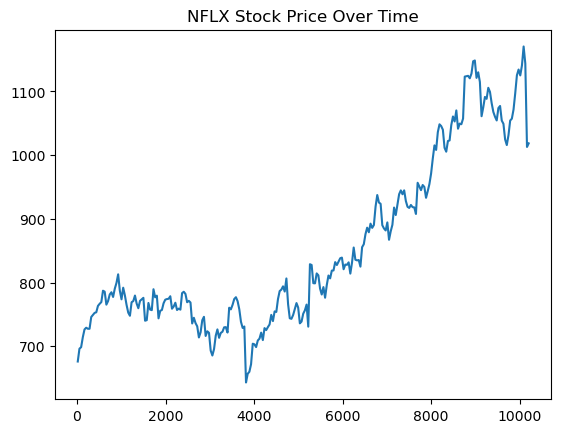

In [58]:
# Plot price data for a specific ticker
plt.plot(df_reshaped[df_reshaped['Ticker'].isin(['NOW',])]['Close'], )
plt.title('NFLX Stock Price Over Time')
plt.show()

In [48]:
Ticker_prices = df_reshaped.groupby('Ticker')['Close'].mean().reset_index()

ticker_prices = Ticker_prices.sort_values(by='Close', ascending=False)

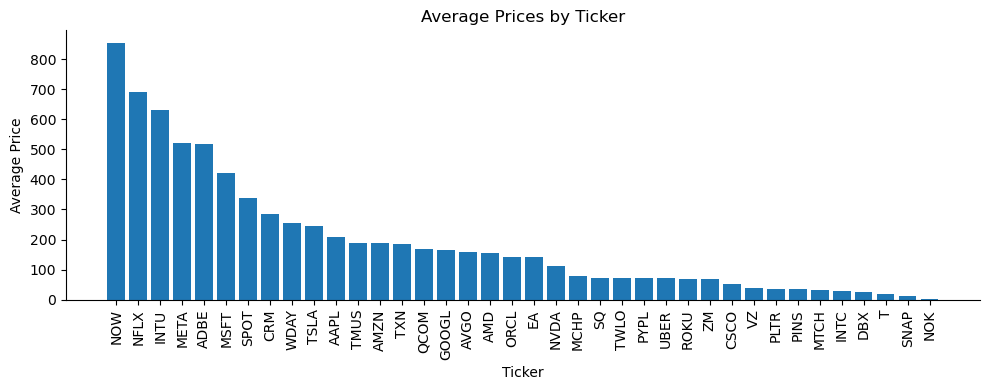

In [60]:
#Ticker_prices = df_reshaped.groupby('Ticker')['Close'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.bar(range(len(ticker_prices['Ticker'])), ticker_prices['Close'])
plt.xlabel('Ticker')
plt.ylabel('Average Price')
plt.title('Average Prices by Ticker')
plt.xticks(range(len(ticker_prices['Ticker'])), ticker_prices['Ticker'], rotation=90)

sns.despine()
plt.tight_layout()
plt.show()